In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('dataset/sleep_health_and_lifestyle_dataset.csv')

In [3]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [61]:
df.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [4]:
df.iloc[:, :-1].isnull().values.any() # Verificando se Exist algum valor Null nos Preditores (Features)

False

In [5]:
df = df.drop(columns=['Blood Pressure'])

In [6]:
df["Sleep Disorder"].fillna("No Problem", inplace = True)
df.iloc[:, -1].isnull().values.any()

False

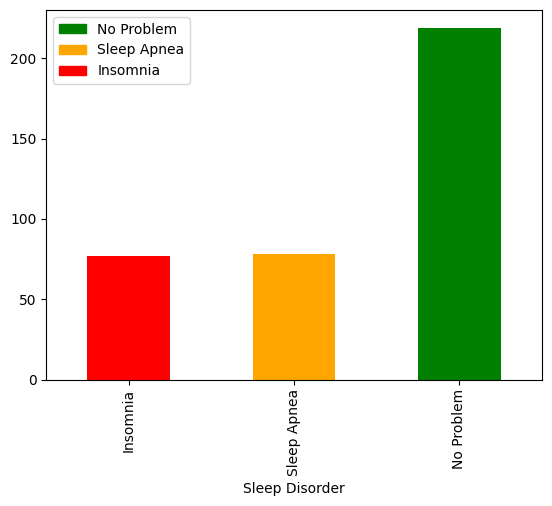

In [7]:
df['Sleep Disorder'].value_counts().sort_values().plot(kind='bar', color=['red', 'orange', 'green'])
colors = {'No Problem': 'green', 'Sleep Apnea': 'orange', 'Insomnia': 'red'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.show()

[]

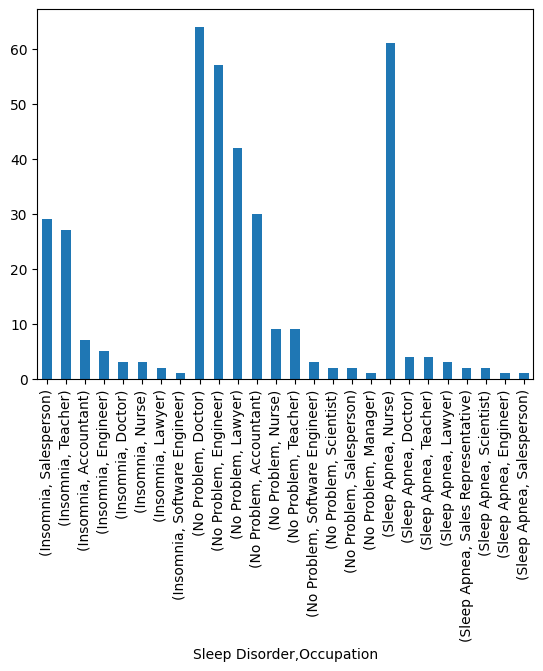

In [8]:
# sns.barplot(y='Occupation',x='Occupation', hue='Sleep Disorder',data=df);
df.groupby(['Sleep Disorder'])['Occupation'].value_counts().plot(kind='bar')
plt.plot()

In [9]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [10]:
X[0]

array(['Male', 27, 'Software Engineer', 6.1, 6, 42, 6, 'Overweight', 77,
       4200], dtype=object)

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [12]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 2, 7])], remainder='passthrough')
X = np.array(ct.fit_transform(X))


In [13]:
X[0]

array([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
       0.0, 0.0, 0.0, 1.0, 27, 6.1, 6, 42, 6, 77, 4200], dtype=object)

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 0:] = sc.fit_transform(X_train[:, 0:])
X_test[:, 0:] = sc.transform(X_test[:, 0:])
# print(X_train)
# print(X_test)

In [53]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(random_state=42, max_iter=512).fit(X_train, y_train)
lr_prediction = lr_classifier.predict(X_test)

In [54]:
from sklearn.metrics import (ConfusionMatrixDisplay, accuracy_score,
                             classification_report, confusion_matrix, f1_score,
                             precision_score, recall_score)


In [55]:
lr_accuracy = accuracy_score(y_test, lr_prediction)
lr_precision = precision_score(y_test, lr_prediction, average='weighted', zero_division=np.nan)
lr_f1 = f1_score(y_test, lr_prediction, average='weighted', zero_division=np.nan)
lr_recall = recall_score(y_test, lr_prediction, average='weighted', zero_division=np.nan)

In [56]:
print(f'Accuracy: {lr_accuracy}')
print(f'Precision: {lr_precision}')
print(f'F1: {lr_f1}')
print(f'Recall: {lr_recall}')
print(f'Report:\n {classification_report(y_test, lr_prediction)}')

Accuracy: 0.88
Precision: 0.8869909622541201
F1: 0.8786688560481664
Recall: 0.88
Report:
               precision    recall  f1-score   support

           0       0.74      0.88      0.80        16
           1       0.93      0.95      0.94        43
           2       0.92      0.69      0.79        16

    accuracy                           0.88        75
   macro avg       0.86      0.84      0.84        75
weighted avg       0.89      0.88      0.88        75



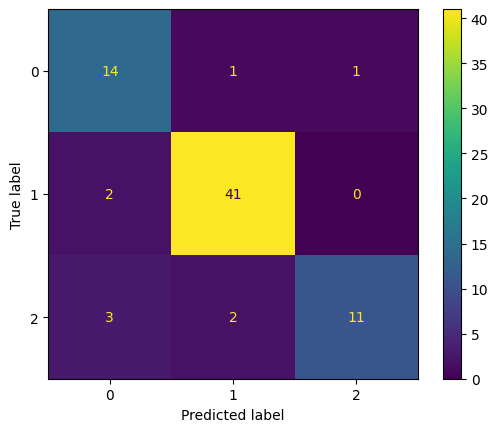

In [57]:
cm = confusion_matrix(y_test, lr_prediction, labels=classifier.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_).plot()
plt.show()

In [50]:
from sklearn.ensemble import ExtraTreesClassifier
etc_classifier = ExtraTreesClassifier(random_state=42).fit(X_train, y_train)
etc_prediction = etc_classifier.predict(X_test)

In [58]:
etc_accuracy = accuracy_score(y_test, etc_prediction)
etc_precision = precision_score(y_test, etc_prediction, average='weighted', zero_division=np.nan)
etc_f1 = f1_score(y_test, etc_prediction, average='weighted', zero_division=np.nan)
etc_recall = recall_score(y_test, etc_prediction, average='weighted', zero_division=np.nan)

In [59]:
print(f'Accuracy: {etc_accuracy}')
print(f'Precision: {etc_precision}')
print(f'F1: {etc_f1}')
print(f'Recall: {etc_recall}')
print(f'Report:\n {classification_report(y_test, etc_prediction)}')

Accuracy: 0.88
Precision: 0.8787611865258924
F1: 0.8771926158133053
Recall: 0.88
Report:
               precision    recall  f1-score   support

           0       0.76      0.81      0.79        16
           1       0.93      0.98      0.95        43
           2       0.85      0.69      0.76        16

    accuracy                           0.88        75
   macro avg       0.85      0.83      0.83        75
weighted avg       0.88      0.88      0.88        75



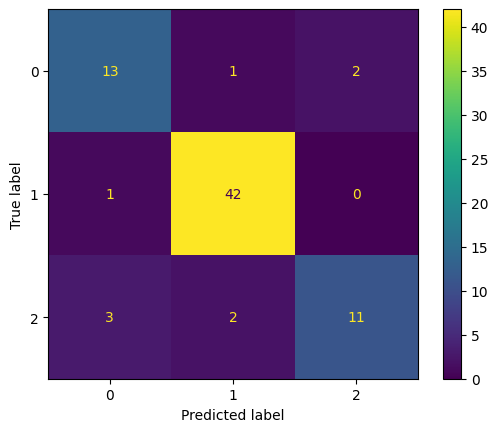

In [60]:
cm = confusion_matrix(y_test, etc_prediction, labels=classifier.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_).plot()
plt.show()